## Importing files and libraries

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [90]:
df = pd.read_csv('TASK.csv')
print(df.shape)
df.head()

(9564, 34)


,id,date,time,country,nearest_places,hazard_type,landslide_type,trigger,storm_name,fatalities,...,population,countrycode,continentcode,key,version,tstamp,changeset_id,latitude,longitude,geolocation
0,1,01/02/2007,NaN,United Kingdom,"Whitehaven, Cumbria",landslide,Landslide,Rain,NaN,1.0,...,24803.0,GB,EU,sGaiIKdcW,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,54.549400,-3.587500,"(54.549399999999999, -3.5874999999999999)"
1,2,01/03/2007,NaN,Peru,"Alto Mesapata, in the Pasco province",landslide,Complex,Rain,NaN,NaN,...,0.0,PE,SA,S95OsumK4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-10.383800,-75.426700,"(-10.383800000000001, -75.426699999999997)"
2,3,01/05/2007,NaN,Brazil,"Nova Friburgo, Rio de Janeiro",landslide,Landslide,Rain,NaN,7.0,...,153361.0,BR,SA,D5vlNdgB7,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-22.282346,-42.536362,"(-22.282346350000001, -42.536362050000001)"
3,4,01/05/2007,NaN,Brazil,"Sumidouro, Rio de Janeiro",landslide,Landslide,Rain,NaN,2.0,...,11555.0,BR,SA,h5J8IFdc4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-22.045200,-42.673400,"(-22.045200000000001, -42.673400000000001)"
4,5,01/05/2007,NaN,Brazil,"Jundiai, Sao Paulo",landslide,Landslide,Rain,NaN,1.0,...,54415.0,BR,SA,s5Zb5FdB4,1.0,Tue Apr 01 2014 00:00:00 GMT+0000 (UTC),1.0,-23.231100,-46.613600,"(-23.231100000000001, -46.613599999999998)"


## Data Preprocessing

In [100]:
df.describe()

,id,fatalities,injuries,cat_id,distance,population,version,changeset_id,latitude,longitude
count,5476.000000,4202.000000,835.000000,5442.000000,5442.000000,5.442000e+03,5467.000000,5.467000e+03,5476.000000,5476.000000
mean,3548.208729,2.670157,0.243114,3515.103087,11.915075,1.585489e+05,1.047192,4.195282e+08,26.127632,-2.977720
std,2549.180586,29.490374,1.805151,2523.197878,15.003765,7.818965e+05,0.212069,1.014671e+09,19.641790,101.148188
min,2.000000,0.000000,0.000000,2.000000,0.000820,0.000000e+00,1.000000,1.000000e+00,-45.858000,-170.799800
25%,1512.750000,0.000000,0.000000,1502.500000,2.461323,1.883250e+03,1.000000,1.000000e+00,13.976750,-117.133750
50%,3124.500000,0.000000,0.000000,3103.500000,6.638175,7.317000e+03,1.000000,1.000000e+00,30.497900,-1.488950
75%,4716.250000,1.000000,0.000000,4680.750000,16.170175,3.374800e+04,1.000000,1.000000e+00,42.568175,93.684575
max,9681.000000,1765.000000,20.000000,9614.000000,215.448880,1.269184e+07,2.000000,4.291189e+09,72.627500,179.422100


### Null Values

<Axes: >

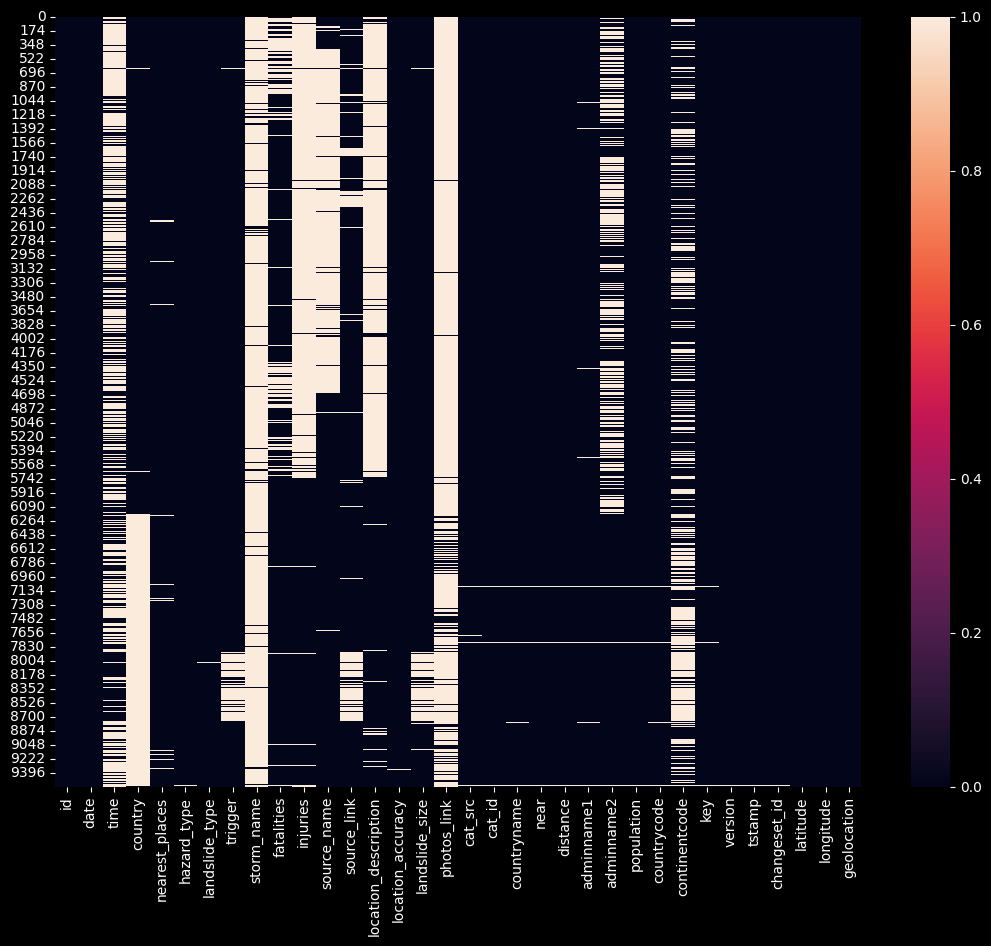

In [91]:
null_percent = df.isnull().mean() * 100

plt.figure(figsize=(13,10))
sns.heatmap(df.isna())

In [92]:
print(null_percent.sort_values(ascending=False))

storm_name              94.249268
photos_link             89.659138
injuries                58.782936
time                    57.925554
location_description    57.036805
source_name             42.022166
continentcode           39.836888
country                 35.518611
adminname2              31.597658
fatalities              14.136345
source_link             13.916771
landslide_size           8.260142
trigger                  7.904642
adminname1               1.223338
nearest_places           0.961941
countrycode              0.460059
countryname              0.439147
cat_src                  0.376412
near                     0.365956
cat_id                   0.355500
distance                 0.355500
population               0.355500
key                      0.292765
landslide_type           0.188206
hazard_type              0.094103
version                  0.094103
tstamp                   0.094103
changeset_id             0.094103
location_accuracy        0.020912
date          

In [93]:
df.drop(columns=['storm_name', 'photos_link', 'source_link'], axis = 1, inplace = True)
df.shape

(9564, 31)

In [94]:
threshold = 0.1

# Calculate the percentage of null values for each row
null_percentage = df.isnull().mean(axis=1)

# Drop rows where the percentage of null values is less than the threshold
df = df[null_percentage >= threshold]
df.shape

(5476, 31)

#### Unique values identification

In [96]:
df.nunique()

id                      5476
date                    1897
time                     744
country                  122
nearest_places          5150
hazard_type                1
landslide_type             9
trigger                   16
fatalities                68
injuries                   8
source_name              529
location_description      11
location_accuracy         17
landslide_size             4
cat_src                    2
cat_id                  5440
countryname              117
near                    2747
distance                5375
adminname1               659
adminname2               698
population              2238
countrycode              116
continentcode              5
key                     5446
version                    2
tstamp                  1065
changeset_id            1064
latitude                5242
longitude               5282
geolocation             5378
dtype: int64

In [108]:
print("cat_src: ", df['cat_src'].unique())
print("landslide type: \n", df['landslide_type'].unique())



SyntaxError: invalid syntax (4171889254.py, line 3)

## Outlier Analysis

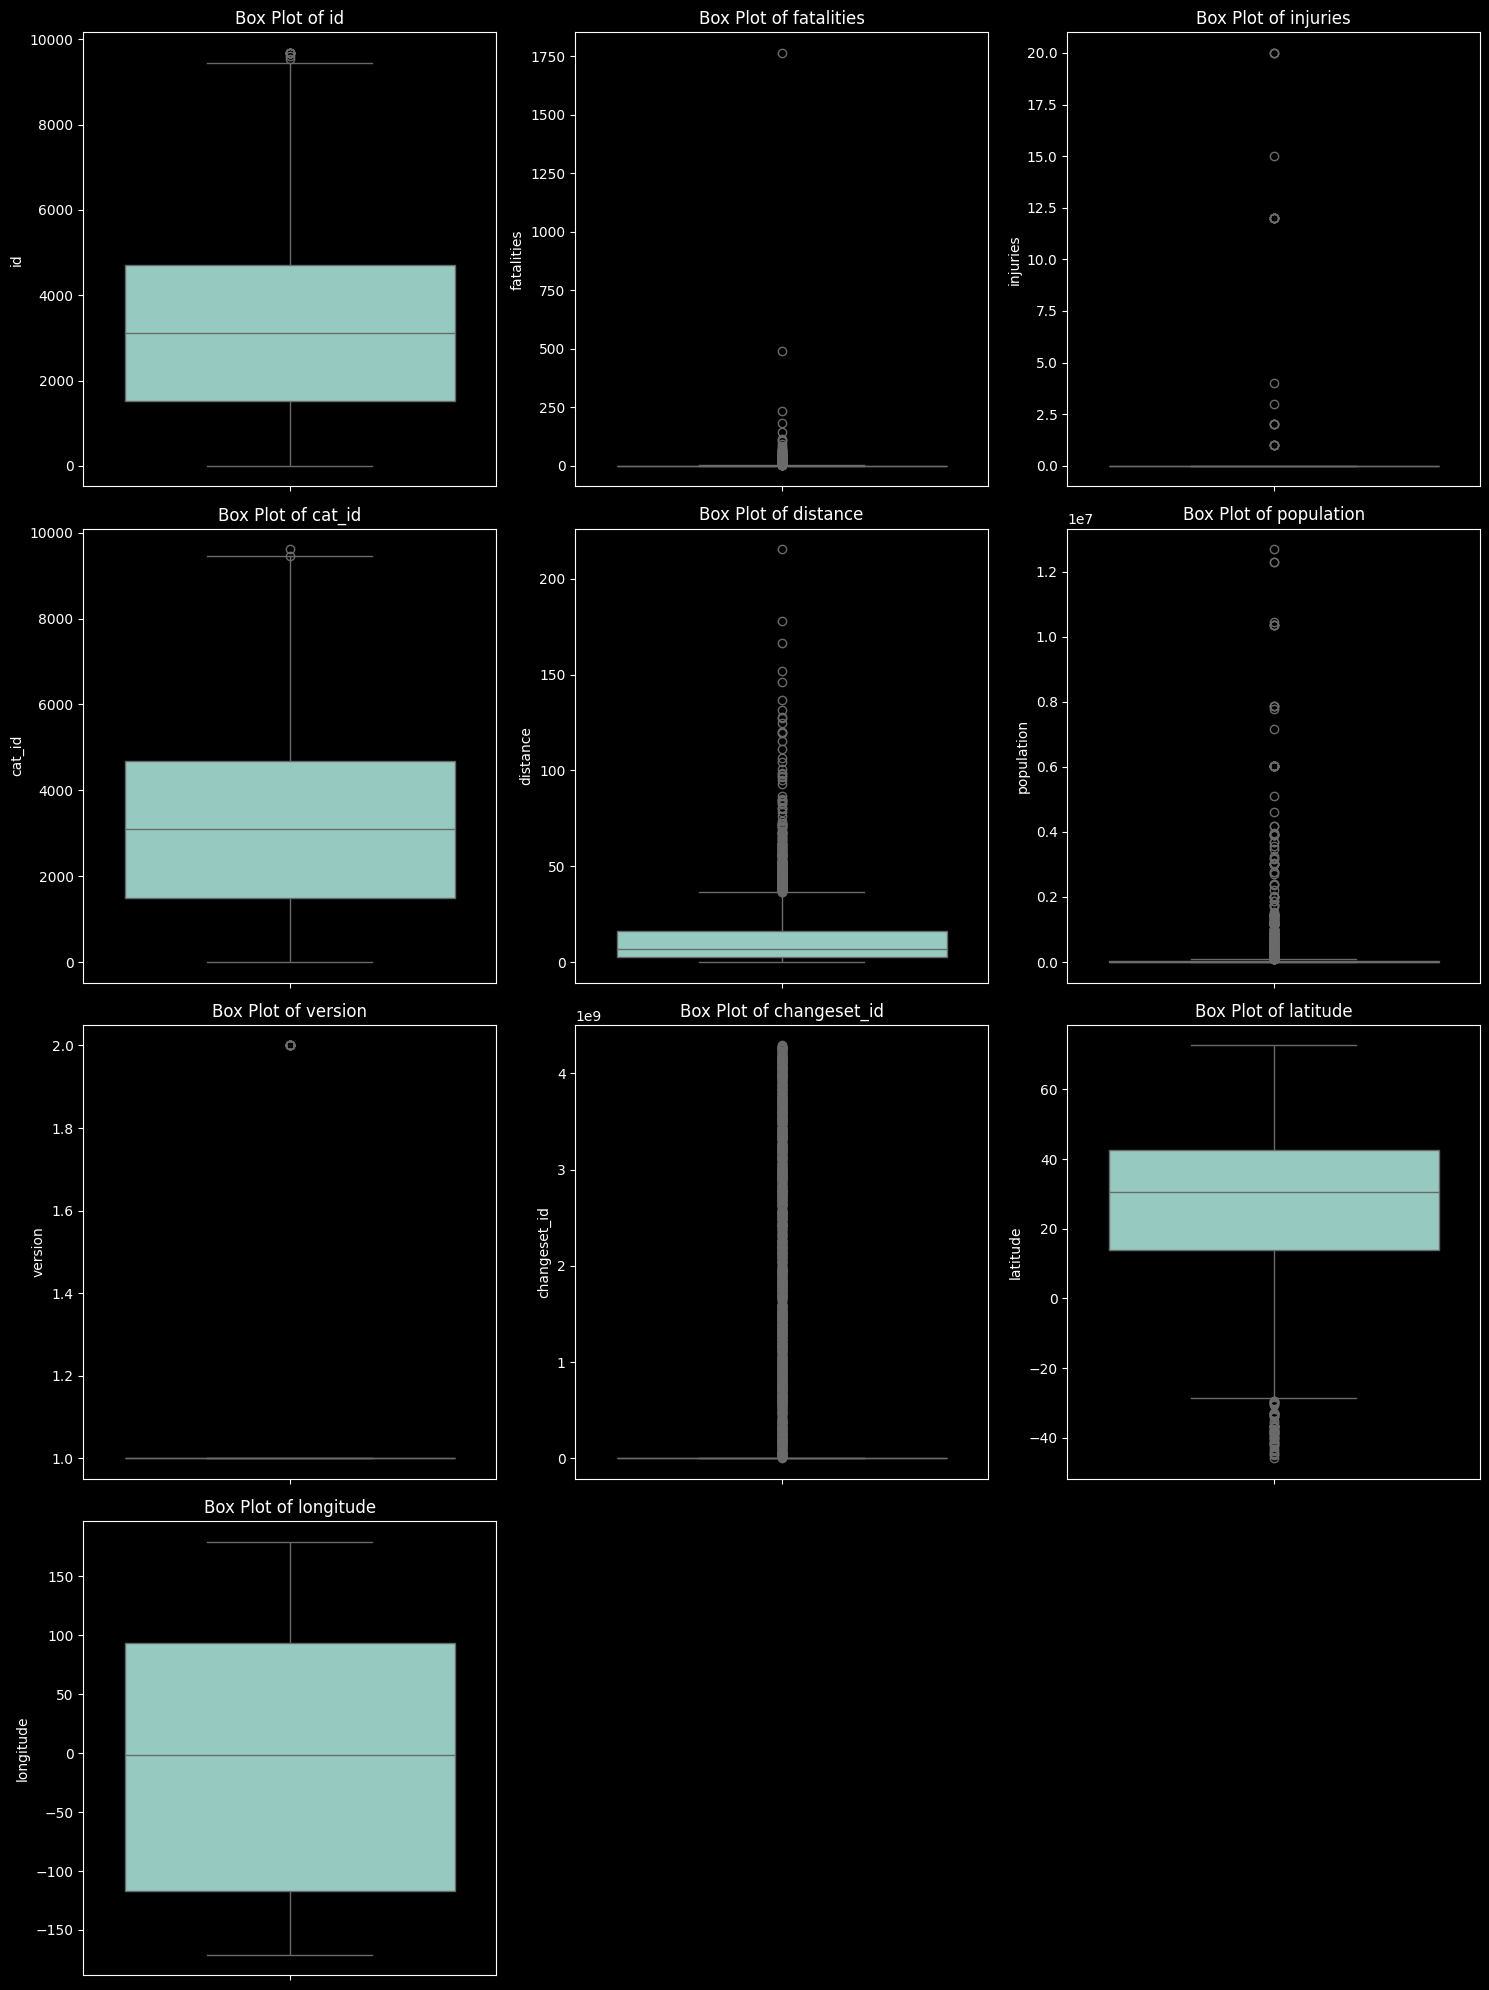

In [113]:
# Identify non-categorical columns
non_categorical_cols = df.select_dtypes(include=['number']).columns

# Number of columns for subplots
n_cols = 3
n_rows = (len(non_categorical_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(15, 5 * n_rows))  # Adjust the figure size

# Plot box plots for each non-categorical column
for i, col in enumerate(non_categorical_cols, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


df.drop()

## Representation

In [95]:
import plotly.express as px

# Create the scatter mapbox plot
fig = px.scatter_mapbox(df,
                       lat='latitude',
                       lon='longitude',
                       hover_name='location_description',
                       color_discrete_sequence=['blue'],  # Customize color
                       size_max=15,  # Adjust marker size
                       title='Location Map with Landslides location',  # Add a title
                       labels={'latitude': 'Latitude', 'longitude': 'Longitude'},  # Add labels
                       mapbox_style='open-street-map')

# Update layout for better appearance
fig.update_layout(
    autosize=True,
    margin={"r":0,"t":40,"l":0,"b":0},  # Adjust margins
    height=600,  # Set height
    width=800,   # Set width
    showlegend=False  # Hide legend if not needed
)

# Show the plot
fig.show()
